In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
new_df = pd.read_csv('./data/new_sales_train.csv')

In [3]:
new_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,ID,item_category_id
0,2013-01-02,0,59,22154,999.0,1,150983,37
1,2013-01-03,0,25,2574,399.0,2,56520,55
2,2013-01-05,0,25,2574,399.0,1,56520,55
3,2013-01-07,0,25,2574,399.0,1,56520,55
4,2013-01-08,0,25,2574,399.0,2,56520,55


In [4]:
new_df.corr()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,ID,item_category_id
date_block_num,1.000000,0.016678,0.047454,0.065900,-0.015946,0.009716,0.004331
shop_id,0.016678,1.000000,0.022555,-0.023457,-0.008699,0.758011,0.015219
item_id,0.047454,0.022555,1.000000,-0.159782,0.039978,-0.007996,0.452412
item_price,0.065900,-0.023457,-0.159782,1.000000,0.006688,-0.002008,-0.278535
item_cnt_day,-0.015946,-0.008699,0.039978,0.006688,1.000000,-0.017401,0.022500
ID,0.009716,0.758011,-0.007996,-0.002008,-0.017401,1.000000,-0.016140
item_category_id,0.004331,0.015219,0.452412,-0.278535,0.022500,-0.016140,1.000000


In [3]:
new_df = new_df.drop(['shop_id'],axis=1)

In [7]:
new_df.head()

,date,date_block_num,item_id,item_price,item_cnt_day,ID,item_category_id
0,2013-01-02,0,22154,999.0,1,150983,37
1,2013-01-03,0,2574,399.0,2,56520,55
2,2013-01-05,0,2574,399.0,1,56520,55
3,2013-01-07,0,2574,399.0,1,56520,55
4,2013-01-08,0,2574,399.0,2,56520,55


In [4]:
new_df['sales_total'] = new_df['item_price'] * new_df['item_cnt_day']

In [9]:
new_df.head()

,date,date_block_num,item_id,item_price,item_cnt_day,ID,item_category_id,sales_total
0,2013-01-02,0,22154,999.0,1,150983,37,999.0
1,2013-01-03,0,2574,399.0,2,56520,55,798.0
2,2013-01-05,0,2574,399.0,1,56520,55,399.0
3,2013-01-07,0,2574,399.0,1,56520,55,399.0
4,2013-01-08,0,2574,399.0,2,56520,55,798.0


<AxesSubplot:>

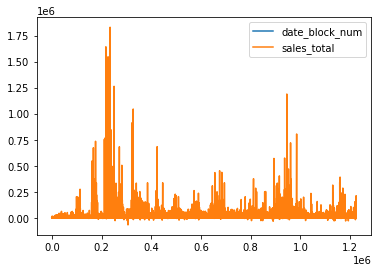

In [13]:
new_df.loc[:,['date_block_num','sales_total']].plot()

In [5]:
src = pd.DataFrame.to_numpy(new_df.loc[:,['date_block_num','item_price','item_cnt_day','sales_total']])

In [13]:
arr = np.empty((0,4),int)
mon = 0.; cnt = 0.; total = 0.

for i in src:
    
    if mon != i[0]:
        arr = np.append(arr, np.array([[mon, (total/cnt), cnt, total]]), axis=0)
        mon += 1; cnt = 0; total = 0
    else:
        cnt += i[2]
        total += i[3]
arr = np.append(arr, np.array([[mon, (total/cnt), cnt, total]]), axis=0)

In [18]:
arr_month = arr.astype(int)
arr_month

array([[        0,       715,     20612,  14750893],
       [        1,       793,     22162,  17583323],
       [        2,       773,     31598,  24439896],
       [        3,       693,     20703,  14358614],
       [        4,       594,     23321,  13871806],
       [        5,       679,     32504,  22098057],
       [        6,       597,     29959,  17888150],
       [        7,       555,     32343,  17954062],
       [        8,      1047,     44100,  46216133],
       [        9,       905,     39752,  35978751],
       [       10,      1375,     44446,  61114895],
       [       11,      1433,     68217,  97779358],
       [       12,       954,     41951,  40060019],
       [       13,      1294,     42843,  55439899],
       [       14,      1061,     49073,  52106028],
       [       15,       925,     37004,  34249167],
       [       16,      1039,     42785,  44460017],
       [       17,       922,     44658,  41211438],
       [       18,       934,     44125,  4121

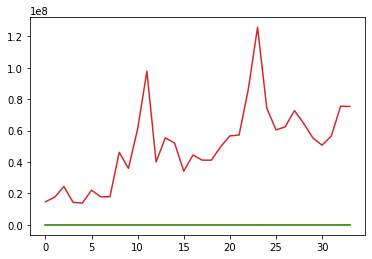

In [19]:
plt.plot(arr_month)

In [20]:
new_df = pd.read_csv('./data/new_sales_train.csv')

In [23]:
new_df.describe(include='all')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,ID,item_category_id
count,1224439,1.224439e+06,1.224439e+06,1.224439e+06,1.224439e+06,1.224439e+06,1.224439e+06,1.224439e+06
unique,1034,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2014-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.935472e+01,3.215117e+01,9.614866e+03,1.030666e+03,1.321234e+00,9.517727e+04,4.055878e+01
std,NaN,9.110722e+00,1.646562e+01,6.299870e+03,1.827384e+03,3.312997e+00,5.651974e+04,1.860682e+01
min,NaN,0.000000e+00,2.000000e+00,3.000000e+01,5.000000e-01,-1.600000e+01,0.000000e+00,2.000000e+00
25%,NaN,1.200000e+01,1.900000e+01,4.181000e+03,2.990000e+02,1.000000e+00,4.784100e+04,2.500000e+01
50%,NaN,2.100000e+01,3.100000e+01,7.856000e+03,5.490000e+02,1.000000e+00,8.716000e+04,3.800000e+01
75%,NaN,2.700000e+01,4.600000e+01,1.522900e+04,1.199000e+03,1.000000e+00,1.400990e+05,5.500000e+01


In [34]:
days = [i for i in new_df['date'].unique()]
days.sort()

In [ ]:
print(days)

In [45]:
new_df = new_df.sort_values(by = 'date', ascending = True)
new_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,ID,item_category_id
16443,2013-01-01,0,42,2090,449.0,1,105096,55
15791,2013-01-01,0,46,14390,149.0,1,190000,40
15792,2013-01-01,0,46,14389,149.0,1,189999,40
3447,2013-01-01,0,28,4906,1799.0,1,44745,19
3792,2013-01-01,0,28,16135,249.0,1,42628,65


In [48]:
daily = new_df.groupby(['date'])['item_cnt_day'].sum()

In [49]:
daily.head()

date
2013-01-01     237
2013-01-02    1349
2013-01-03    1142
2013-01-04     964
2013-01-05     969
Name: item_cnt_day, dtype: int64